### Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Carregando dataset

In [2]:
df = pd.read_csv('tabela5457.csv',sep=';',header=1)

### Eliminando NA's

In [3]:
df = df.dropna()

### Exibindo uma prévia do dataframe

In [4]:
df.head(10)

,Município,Produto das lavouras temporárias e permanentes,Ano,Variável,Unnamed: 4
0,Acopiara (CE),Abacate,2016.0,Valor da produção (Mil Reais),-
1,Acopiara (CE),Abacate,2017.0,Valor da produção (Mil Reais),-
2,Acopiara (CE),Abacate,2018.0,Valor da produção (Mil Reais),-
3,Acopiara (CE),Abacate,2019.0,Valor da produção (Mil Reais),-
4,Acopiara (CE),Abacate,2020.0,Valor da produção (Mil Reais),-
5,Acopiara (CE),Abacaxi*,2016.0,Valor da produção (Mil Reais),-
6,Acopiara (CE),Abacaxi*,2017.0,Valor da produção (Mil Reais),-
7,Acopiara (CE),Abacaxi*,2018.0,Valor da produção (Mil Reais),-
8,Acopiara (CE),Abacaxi*,2019.0,Valor da produção (Mil Reais),-
9,Acopiara (CE),Abacaxi*,2020.0,Valor da produção (Mil Reais),-


### Renomeando a coluna alvo

In [5]:
df = df.rename(columns = {'Unnamed: 4': 'Valor','Produto das lavouras temporárias e permanentes':'Produto'}, inplace = False)

### Eliminando dados inválidos da coluna alvo

In [6]:
df["Valor"].replace({"-": "0", "--": "0", "...":"0"}, inplace=True)

### Convertendo a coluna de valor para númerico

In [7]:
df["Valor"] = df[["Valor"]].apply(pd.to_numeric)

### Filtrando apenas registros que possuam valor maior que zero

In [8]:
df = df[df.Valor > 0]

In [9]:
df

,Município,Produto,Ano,Variável,Valor
26,Acopiara (CE),Algodão herbáceo (em caroço),2017.0,Valor da produção (Mil Reais),10
27,Acopiara (CE),Algodão herbáceo (em caroço),2018.0,Valor da produção (Mil Reais),147
28,Acopiara (CE),Algodão herbáceo (em caroço),2019.0,Valor da produção (Mil Reais),389
29,Acopiara (CE),Algodão herbáceo (em caroço),2020.0,Valor da produção (Mil Reais),736
44,Acopiara (CE),Arroz (em casca),2020.0,Valor da produção (Mil Reais),7
...,...,...,...,...,...
10565,Tauá (CE),Milho (em grão),2016.0,Valor da produção (Mil Reais),2421
10566,Tauá (CE),Milho (em grão),2017.0,Valor da produção (Mil Reais),2212
10567,Tauá (CE),Milho (em grão),2018.0,Valor da produção (Mil Reais),3637
10568,Tauá (CE),Milho (em grão),2019.0,Valor da produção (Mil Reais),5177


### Analisando o valor da produção Por Produto

In [11]:
df[['Produto','Valor']].groupby(['Produto']).sum().sort_values(by=['Valor','Produto'],ascending=False)

,Valor
Produto,
Milho (em grão),486890
Feijão (em grão),405088
Tomate,18415
Mandioca,12205
Banana (cacho),12181
Cana-de-açúcar,8948
Algodão herbáceo (em caroço),8272
Castanha de caju,7323
Fava (em grão),6883


In [112]:
round(df[['Produto','Valor']].groupby(['Produto']).sum().sort_values(by=['Valor','Produto'],ascending=False) / 
df[['Valor']].sum(),2) * 100

,Valor
Produto,
Milho (em grão),49.0
Feijão (em grão),41.0
Tomate,2.0
Mandioca,1.0
Banana (cacho),1.0
Cana-de-açúcar,1.0
Algodão herbáceo (em caroço),1.0
Castanha de caju,1.0
Fava (em grão),1.0


Baseado nas extrações acima, podemos concluir que dentro da Mesorregião Sertões Cearenses, considerando o período analisado (últimos cinco anos), a cultura com o maior valor produzido foi a do Milho(em Grão) representando <b>49%</b> de toda a produção.

Outro dado interessante é que as duas principais culturas já respondem por <b>90%</b> de todo o valor produzido no últimos cinco anos.

### Analisando os maiores produtores por Ano x Município

In [22]:
df_2 = df.groupby(['Município','Ano','Produto']).sum().sort_values(by=['Município','Valor','Produto'],ascending=False)

In [29]:
df_2

Valor
Município     Ano    Produto                
Tauá (CE)     2020.0 Milho (em grão)   12503
                     Feijão (em grão)   5688
              2019.0 Milho (em grão)    5177
                     Feijão (em grão)   3694
              2018.0 Milho (em grão)    3637
...                                      ...
Acopiara (CE) 2020.0 Castanha de caju      4
              2018.0 Castanha de caju      3
              2019.0 Castanha de caju      3
              2016.0 Castanha de caju      2
              2017.0 Castanha de caju      2

[1349 rows x 1 columns]

### Gerando um conjunto de Municípios

In [30]:
mun = set(list(df['Município'].values))

In [31]:
mun

{'Acopiara (CE)',
 'Aiuaba (CE)',
 'Ararendá (CE)',
 'Arneiroz (CE)',
 'Banabuiú (CE)',
 'Boa Viagem (CE)',
 'Catarina (CE)',
 'Choró (CE)',
 'Crateús (CE)',
 'Deputado Irapuan Pinheiro (CE)',
 'Ibaretama (CE)',
 'Independência (CE)',
 'Ipaporanga (CE)',
 'Madalena (CE)',
 'Milhã (CE)',
 'Mombaça (CE)',
 'Monsenhor Tabosa (CE)',
 'Nova Russas (CE)',
 'Novo Oriente (CE)',
 'Parambu (CE)',
 'Pedra Branca (CE)',
 'Piquet Carneiro (CE)',
 'Quiterianópolis (CE)',
 'Quixadá (CE)',
 'Quixeramobim (CE)',
 'Saboeiro (CE)',
 'Senador Pompeu (CE)',
 'Solonópole (CE)',
 'Tamboril (CE)',
 'Tauá (CE)'}

### Iterando sobre os dados para listar o ranking de produtos por municípios

In [75]:
df_produto_x_mun = df[['Produto','Município','Valor']].groupby(['Produto','Município']).sum().reset_index().sort_values(by='Valor',ascending=False)



In [76]:
df_produto_x_mun

,Produto,Município,Valor
280,Milho (em grão),Crateús (CE),62179
300,Milho (em grão),Tamboril (CE),51801
173,Feijão (em grão),Tamboril (CE),47132
290,Milho (em grão),Novo Oriente (CE),42017
153,Feijão (em grão),Crateús (CE),39240
...,...,...,...
24,Arroz (em casca),Mombaça (CE),2
195,Mamona (baga),Novo Oriente (CE),2
95,Castanha de caju,Mombaça (CE),2
190,Mamona (baga),Choró (CE),2


In [77]:
for k in mun:
    print('Município: ' + k)
    df_mun = df_produto_x_mun[['Produto','Valor']].loc[df_produto_x_mun['Município']==k].sort_values(by='Valor',ascending=False)
    
    df_mun.sort_values(by='Valor',ascending=False, inplace=True)
    
    prod = list(df_mun['Produto'])
    val = list(df_mun['Valor'])
    val_sum = np.array(val).sum()
    print(df_mun)
    #print('\n')
    
#    for j in range(0,3):
#        print('  -> '+ str(j+1) + 'o.', prod[j],':',val[j])


Município: Milhã (CE)
                          Produto  Valor
159              Feijão (em grão)   8362
286               Milho (em grão)   8064
72                 Cana-de-açúcar    449
222                      Mandioca    301
116                 Coco-da-baía*    202
305                        Tomate    141
40                 Banana (cacho)    113
59                    Batata-doce     98
183                       Laranja     86
9    Algodão herbáceo (em caroço)     75
270                      Melancia     29
247                         Manga     28
Município: Solonópole (CE)
              Produto  Valor
172  Feijão (em grão)   8968
299   Milho (em grão)   8717
63        Batata-doce    471
82     Cana-de-açúcar    330
234          Mandioca    241
53     Banana (cacho)     87
129     Coco-da-baía*     81
259             Manga     31
104  Castanha de caju      6
Município: Acopiara (CE)
                          Produto  Valor
272               Milho (em grão)  18576
145              Feij

In [83]:
df_total = pd.DataFrame()
for municipio in df_produto_x_mun['Município'].unique():
    df_total = df_total.append(df_produto_x_mun[df_produto_x_mun['Município'] == municipio].sort_values('Valor').head(3))

df_total.sort_values(['Município','Valor'],ascending=False)

,Produto,Município,Valor
261,Manga,Tauá (CE),137
20,Algodão herbáceo (em caroço),Tauá (CE),92
105,Castanha de caju,Tauá (CE),6
83,Cana-de-açúcar,Tamboril (CE),29
130,Coco-da-baía*,Tamboril (CE),29
...,...,...,...
267,Melancia,Aiuaba (CE),18
188,Mamona (baga),Aiuaba (CE),4
85,Castanha de caju,Acopiara (CE),14
132,Fava (em grão),Acopiara (CE),12


In [49]:
df_anual = df_produto_x_mun[['Ano','Valor']].groupby('Ano').sum().reset_index()#.plot()

In [51]:
minimo = df_anual['Ano'].astype(int).min()
maximo = df_anual['Ano'].astype(int).max()

In [53]:
minimo = df_produto_x_mun['Ano'].astype(int).min()
maximo = df_produto_x_mun['Ano'].astype(int).max()
#df_produto_x_mun['Ano'] = pd.date_range(minimo, maximo)

In [71]:
#df_produto_x_mun[['Ano','Valor']].set_index('Ano').plot()
df_anual['Ano'] = pd.date_range(start='2016-01-01',periods=5,freq='A')

<AxesSubplot:xlabel='Ano'>

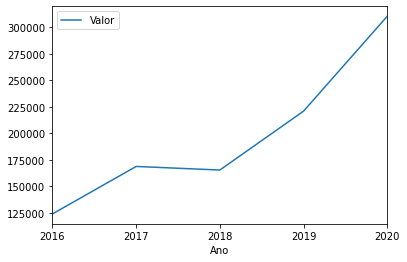

In [72]:
df_anual.set_index('Ano').plot()